In [101]:
import pandas as pd
import numpy as np

In [121]:
import plotly.express as px

In [139]:
df = pd.read_excel("./sed17-sr-tab012.xlsx", header = 3)

In [140]:
df.head()

,Field of study,1987,Unnamed: 2,1992,Unnamed: 4,1997,Unnamed: 6,2002,Unnamed: 8,2007,Unnamed: 10,2012,Unnamed: 12,2017,Unnamed: 14
0,NaN,Number,Percent,Number,Percent,Number,Percent,Number,Percent,Number,Percent,Number,Percent,Number,Percent
1,All fields,32365,100,38886,100,42539,100,40031,100,48132,100,50944,100,54664,100
2,Life sciences,5783,17.9,7172,18.4,8421,19.8,8478,21.2,10702,22.2,11964,23.5,12592,23
3,Agricultural sciences and natural resources,1144,3.5,1261,3.2,1212,2.8,1129,2.8,1321,2.7,1255,2.5,1606,2.9
4,Biological and biomedical sciences,3839,11.9,4799,12.3,5788,13.6,5695,14.2,7238,15,8322,16.3,8477,15.5


In [104]:
df1 = df.iloc[[2,6,10,13,20,30,36,41],[0,1,3,5,7,9]]

In [105]:
df1

,Field of study,1987,1992,1997,2002,2007
2,Life sciences,5783,7172,8421,8478,10702
6,Physical sciences and earth sciences,3811,4517,4550,3875,4956
10,Mathematics and computer sciences,1189,1927,2032,1729,3042
13,Psychology and social sciences,6063,6562,7369,6925,7309
20,Engineering,3712,5438,6114,5081,7749
30,Education,6453,6677,6577,6508,6448
36,Humanities and arts,3478,4387,5285,5297,5085
41,Othera,1876,2206,2191,2138,2841


In [132]:
df2 = df1.melt(var_name = 'Year', id_vars = 'Field of study', value_name = 'Doctorate recipients')

In [133]:
df2

,Field of study,Year,Doctorate recipients
0,Life sciences,1987,5783
1,Physical sciences and earth sciences,1987,3811
2,Mathematics and computer sciences,1987,1189
3,Psychology and social sciences,1987,6063
4,Engineering,1987,3712
5,Education,1987,6453
6,Humanities and arts,1987,3478
7,Othera,1987,1876
8,Life sciences,1992,7172
9,Physical sciences and earth sciences,1992,4517


In [138]:
fig = px.line(df2, x = 'Year', y = 'Doctorate recipients', color = 'Field of study', title='Doctorate recipients over time')
fig.update_traces(mode="markers+lines")
fig.update_xaxes(showspikes=True, spikecolor="green", spikesnap="cursor", spikemode="across")
fig.update_yaxes(showspikes=True, spikecolor="orange", spikethickness=2)
fig.update_layout(spikedistance=1000, hoverdistance=100)

In [79]:
df2.iloc[:,0]

1987     5783
1992     7172
1997     8421
2002     8478
2007    10702
Name: Life sciences, dtype: object

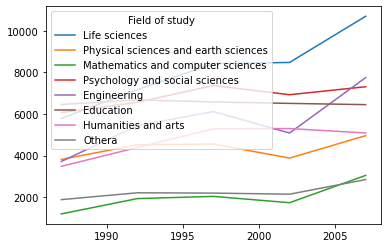

In [87]:
ax = df2.plot.line()
ax.locator_params(integer=True)
plt.show()

<AxesSubplot:>

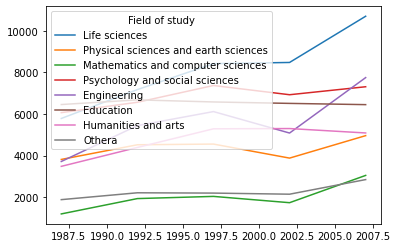

In [88]:
df2.plot.line()

In [89]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px
import pandas as pd

In [90]:
external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

app = dash.Dash(__name__, external_stylesheets=external_stylesheets)

Dash is running on http://127.0.0.1:8050/

 in production, use a production WSGI server like gunicorn instead.

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


SystemExit: 1

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3425: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


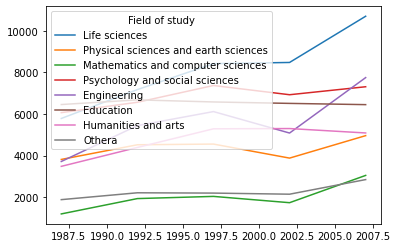

In [91]:
ax = df2.plot.line()

app.layout = html.Div(children=[
    html.H1(children='Hello Dash'),

    html.Div(children='''
        Dash: A web application framework for Python.
    '''),

    dcc.Graph(
        id='example-graph',
        figure=fig
    )
])

if __name__ == '__main__':
    app.run_server(debug=True)